In [43]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

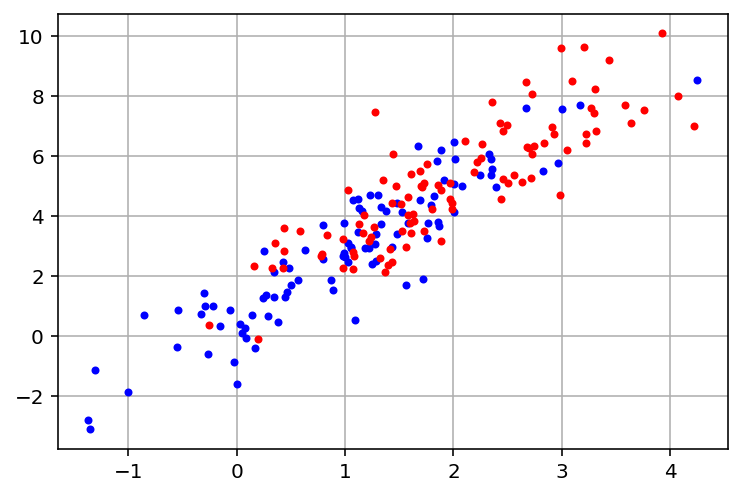

In [44]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


In [45]:
xs.shape
xs = xs.T

1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

In [46]:
np.mean(xs, axis=0)

array([1.4990157 , 3.97069782])

In [47]:
features = xs - np.mean(xs, axis=0)

In [48]:
X = features/np.std(features, axis=0)

2) What is the criteria for picking better axis?

In [54]:
cov = X.T @ X


In [55]:
cov

array([[200.        , 181.10635762],
       [181.10635762, 200.        ]])

3) What is the size of the covariance matrix? Why?

In [60]:
w, v = np.linalg.eig(cov)

In [62]:
w # eigen values

array([381.10635762,  18.89364238])

In [65]:
v # eigen vectors
print(v[:,0])
print(v[:,1])

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


In [82]:
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

4) Find eigenvalue and eigenvector of the covariance matrix.

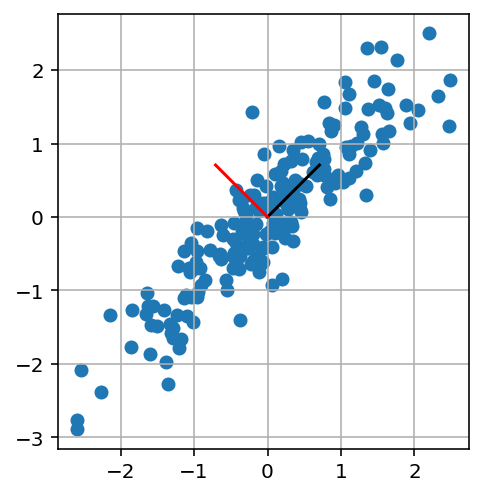

In [79]:
xs, ys = X.T
plt.scatter(xs, ys)
plt.plot([0,v[0,0]], [0,v[1,0]], color='black')
plt.plot([0,v[0,1]], [0,v[1,1]], color='red')
plt.gca().set_aspect('equal')
plt.grid()

5) Draw the eigenvectors on the plot.

6) Use eigenvector and compute the transformed feature vector.

In [80]:
zs = X @ v

In [83]:
np.std(zs, axis=0)

array([1.38041001, 0.30735682])

7) Plot transformed data point.

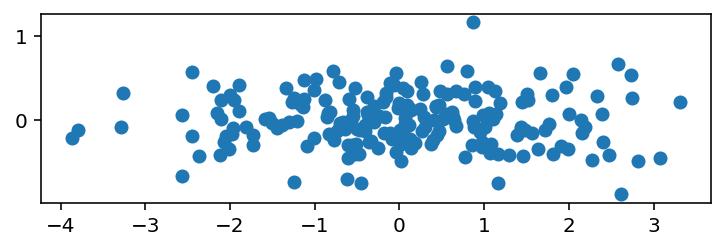

In [85]:
xs, ys = zs.T
plt.scatter(xs, ys)
plt.gca().set_aspect('equal')

# Handwritten Digit Recognition.

In [86]:
D = loadmat('usps_resampled/usps_resampled.mat')
print(D)
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Fri Dec  3 17:13:58 2004', '__version__': '1.0', '__globals__': [], 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ...,
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.93247736, -0.99999988, ..., -0.99999988,
        -0.99563289, -0.99999988],
       [-0.99916363, -0.99033844, -0.99999988, ..., -0.99999988,
        -0.99974871, -0.99999988]]), 'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1

(256, 4649)


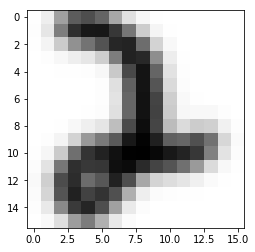

In [63]:
images = D['train_patterns']
print images.shape
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='none', cmap=cm.Greys)
show(images[:,4610])